# Exploratory Data Analysis of Article-Level Dataset

The article-level dataset provides a rich amountt of information about articles on the content-level, such as the formatting, text, code, and resources (images/links). It is thus worth conducting an analysis on the article level.

# Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
import seaborn as sns
import math

from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import Counter
pd.options.display.max_seq_items = None
pd.options.display.max_colwidth = 1000000

from scipy import stats


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Read dataset

In [2]:
df = pd.read_csv("../../data/features_analysis/df_story_features_analysis_whole.csv", low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972614 entries, 0 to 5972613
Columns: 110 entries, AuthorArticlesClap_count to isPublication
dtypes: float64(54), int64(34), object(22)
memory usage: 4.9+ GB


In [13]:
df.columns

Index(['AuthorArticlesClap_count', 'AuthorArticlesClap_mean',
       'AuthorArticlesClap_median', 'AuthorArticlesClap_sum',
       'AuthorArticlesResponse_count', 'AuthorArticlesResponse_mean',
       'AuthorArticlesResponse_median', 'AuthorArticlesResponse_sum',
       'AuthorArticlesVoter_count', 'AuthorArticlesVoter_mean',
       'AuthorArticlesVoter_median', 'AuthorArticlesVoter_sum', 'BoldNum',
       'ClapCount_Card', 'ClapCount_Story', 'CodeBlockLengthMax',
       'CodeBlockLengthMean', 'CodeBlockLengthMedian', 'CodeBlockLengthMin',
       'CodeBlockLengthStd', 'CodeBlockLengthSum', 'CodeBlockNum',
       'CodeBlockRaw', 'CodeInlineNum', 'CodeInlineRaw', 'Company',
       'CompanyURL', 'HLightTextList', 'HasFeaturedImage', 'HlightNum',
       'ImgNum', 'ItalicNum', 'LinkNum', 'LinkURLList', 'ListOlLength',
       'ListOlMax', 'ListOlMean', 'ListOlMedian', 'ListOlMin', 'ListOlNum',
       'ListOlStd', 'ListOlSum', 'ListUlLength', 'ListUlMax', 'ListUlMean',
       'ListUlMedian', 

# Analysis

## Claps

### The median / mean number of claps is 1 / 70, and almost half of all articles have zero claps.

Median number of claps: 1.0
Mean number of claps: 69.78024580192191


Percentage of articles that have no claps:  48.25213884573823
Percentage of articles that have at least one clap:  51.74786115426177
Percentage of articles that have at least 10 claps:  27.34886265879563
Percentage of articles that have at least 100 claps:  10.625129968218271
Percentage of articles that have at least 1000 claps:  1.142447846118969


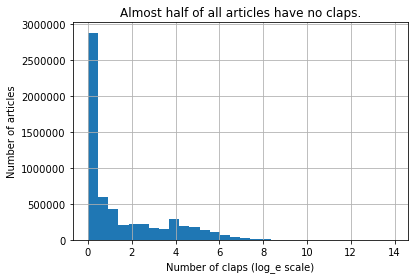

In [4]:
print("Median number of claps:", df.ClapCount_Story.median())
print("Mean number of claps:", df.ClapCount_Story.mean())

print("\n")
print("Percentage of articles that have no claps: ", 100 * len(df[df.ClapCount_Story == 0])/len(df))
print("Percentage of articles that have at least one clap: ", 100 * len(df[df.ClapCount_Story >= 1])/len(df))
print("Percentage of articles that have at least 10 claps: ", 100 * len(df[df.ClapCount_Story >= 10])/len(df))
print("Percentage of articles that have at least 100 claps: ", 100 * len(df[df.ClapCount_Story >= 100])/len(df))
print("Percentage of articles that have at least 1000 claps: ", 100 * len(df[df.ClapCount_Story >= 1000])/len(df))

np.log1p(df.ClapCount_Story).hist(bins=30);
plt.title("Almost half of all articles have no claps.");
plt.xlabel("Number of claps (log_e scale)");
plt.ylabel("Number of articles");

### URLs of the top 25 clapped stories and their clap counts

In [5]:
display(df.sort_values(by="ClapCount_Story",ascending=False).head(50)[['StoryURL', "ClapCount_Story"]])


,StoryURL,ClapCount_Story
411175,https://medium.com/@Rjdlee/how-we-created-the-most-clapped-story-on-medium-ever-57b9c37c5471?source=tag_archive---------29-----------------------#--responses,1091666.0
208698,https://medium.com/hackernoon/hello-world-79436a73e443?source=tag_archive---------20-----------------------#--responses,1040015.0
990201,https://medium.com/@jacksoncunningham/digital-exile-how-i-got-banned-for-life-from-airbnb-615434c6eeba?source=tag_archive---------0-----------------------#--responses,305356.0
4514995,https://medium.com/personal-growth/the-most-important-skill-nobody-taught-you-9b162377ab77?source=tag_archive---------0-----------------------#--responses,295487.0
4568348,https://humanparts.medium.com/laziness-does-not-exist-3af27e312d01?source=tag_archive---------0-----------------------#--responses,273450.0
4725212,https://medium.com/personal-growth/travel-is-no-cure-for-the-mind-e449d3109d71?source=tag_archive---------0-----------------------#--responses,271955.0
5194601,https://gen.medium.com/how-a-tv-sitcom-triggered-the-downfall-of-western-civilization-336e8ccf7dd0?source=tag_archive---------0-----------------------#--responses,240423.0
4574636,https://medium.com/personal-growth/the-3-keys-to-becoming-irresistible-d2f689ea4bf1?source=tag_archive---------0-----------------------#--responses,239607.0
3936204,https://medium.com/refactoring-ui/7-practical-tips-for-cheating-at-design-40c736799886?source=tag_archive---------0-----------------------#--responses,235153.0
83020,https://medium.com/hackernoon/im-harvesting-credit-card-numbers-and-passwords-from-your-site-here-s-how-9a8cb347c5b5?source=tag_archive---------0-----------------------#--responses,225664.0


# Text Dimension

Aspects: Word count and readability, sentiment

## Sentiment

### The majority of articles are skewed towards positive sentiment (higher polarity) and more factual style of writing (lower subjectivity).

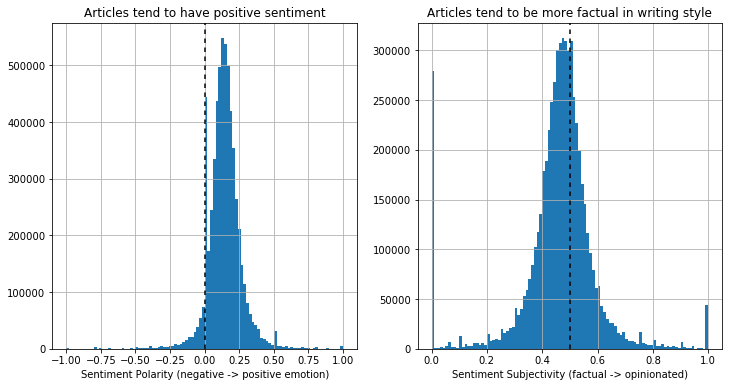

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12, 6));
# figure(figsize=(10,8))

df.SentimentPolarity.hist(bins=100, ax=ax[0]);
ax[0].set_title("Articles tend to have positive sentiment");
ax[0].set_xlabel("Sentiment Polarity (negative -> positive emotion)");
ax[0].axvline(0, c="Black", dashes=[3, 3]);

df.SentimentSubjectivity.hist(bins=100, ax=ax[1]);
ax[1].set_title("Articles tend to be more factual in writing style");
ax[1].set_xlabel("Sentiment Subjectivity (factual -> opinionated)");
ax[1].axvline(0.5, c="Black", dashes=[3, 3]);

## Word Count

### The median article has 527 words.

This finding supports the claim that SE-related articles on Medium contain rich content.

Median number of words 526.9999999999999


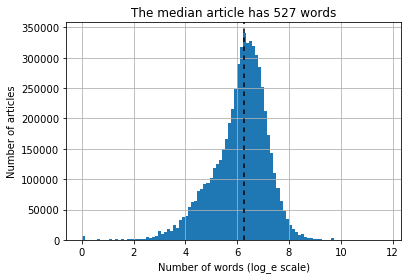

In [7]:
y = np.log(df.WordNum);
print("Median number of words", np.e**y.median());
ax = y.hist(bins=100);
ax.set_title("The median article has 527 words");
ax.set_xlabel("Number of words (log_e scale)");
ax.set_ylabel("Number of articles");
ax.axvline(y.median(), c="Black", dashes=[3, 3]);

### Using #syllables / #words as a measure of word length in an article

### Articles with abnormally high syllables per word (>50) appear to be long lists of links, some of which are useful, some of which are spam

This could be a way of detecting and filtering out bad articles, or simply just filtering out articles with less than N words

In [8]:
df['TextSyllablePerWord'] = df.TextSyllableNum/df.TextLexiconNum;
print("Articles with abnormally high syllables per word:")
print(df[df['TextSyllablePerWord'] > 50].sort_values(by = "TextSyllablePerWord", ascending=True).head(5).StoryURL)
y = df['TextSyllablePerWord']

print("Median number of syllables per word is: ", y.median());
# ax = y.hist(bins=100);
# ax.set_xlabel("Number of syllables");
# ax.set_ylabel("Number of articles");


Articles with abnormally high syllables per word:
2142875             https://medium.com/@ZachSchleien/subreddits-for-mental-illness-6d48f5766d9a?source=tag_archive---------0-----------------------#--responses
4243633                  https://medium.com/@turhalnakliyatt/i%CC%87stanbul-evden-eve-nakliyat-51116314c444?source=tag_archive---------7-----------------------
1179854                            https://medium.com/@bitcoin4dollar.tbc/exchange-bewertung-b7c0b5c57bf2?source=tag_archive---------170-----------------------
424203       https://medium.com/@learnreact/inline-styles-for-basic-pseudo-classes-ee8f564792d4?source=tag_archive---------0-----------------------#--responses
1806147    https://medium.com/@vaiperzeli/easy-ways-amazon-gift-card-2019-2020-free-generator-bd198a2fbe2e?source=tag_archive---------87-----------------------
Name: StoryURL, dtype: object
Median number of syllables per word is:  1.5268817204301075


## Readability Metrics

### Readabity metrics show that Medium articles tend to be complex in readability level (senior high school to university level)

Most of the readability formulas calculate a grade level (i.e. the minimum school grade that a student would need to have completed to understand the text), meaning that a higher number means more complex, except for FleschEase, where higher number means more readable.

The readability formulas show that the median readability of Medium articles is quite complex, understood by a senior high school student to university student (around Grade 12-16, and the value of 8 in Dale-Chall and 40 Flesch-Ease corresponds to Grade 11/12). This is not surprising given the length of articles is quite long on average (as previously shown in the distribution of word count), and specifically, SE related articles may involve lots of technical jargon.

The readability formulas were calculated using textstat. [Reference on the readability formulas used here](https://pypi.org/project/textstat/)


Median of ReadabilityColemanLiau 12.599999999999996
Median of ReadabilityConsensus 13.999999999999995
Median of ReadabilityDaleChall 8.18
Median of ReadabilityDifficultWordsNum 93.00000000000001
Median of ReadabilityFleschEase 47.24999999999999
Median of ReadabilityFleschKincaid 14.899999999999995
Median of ReadabilityGunningFog 15.849999999999994
Median of ReadabilityLinsearWriteFormula 16.499999999999996
Median of ReadabilityReadingTime 41.759999999999984
Median of ReadabilitySMOG 14.299999999999997


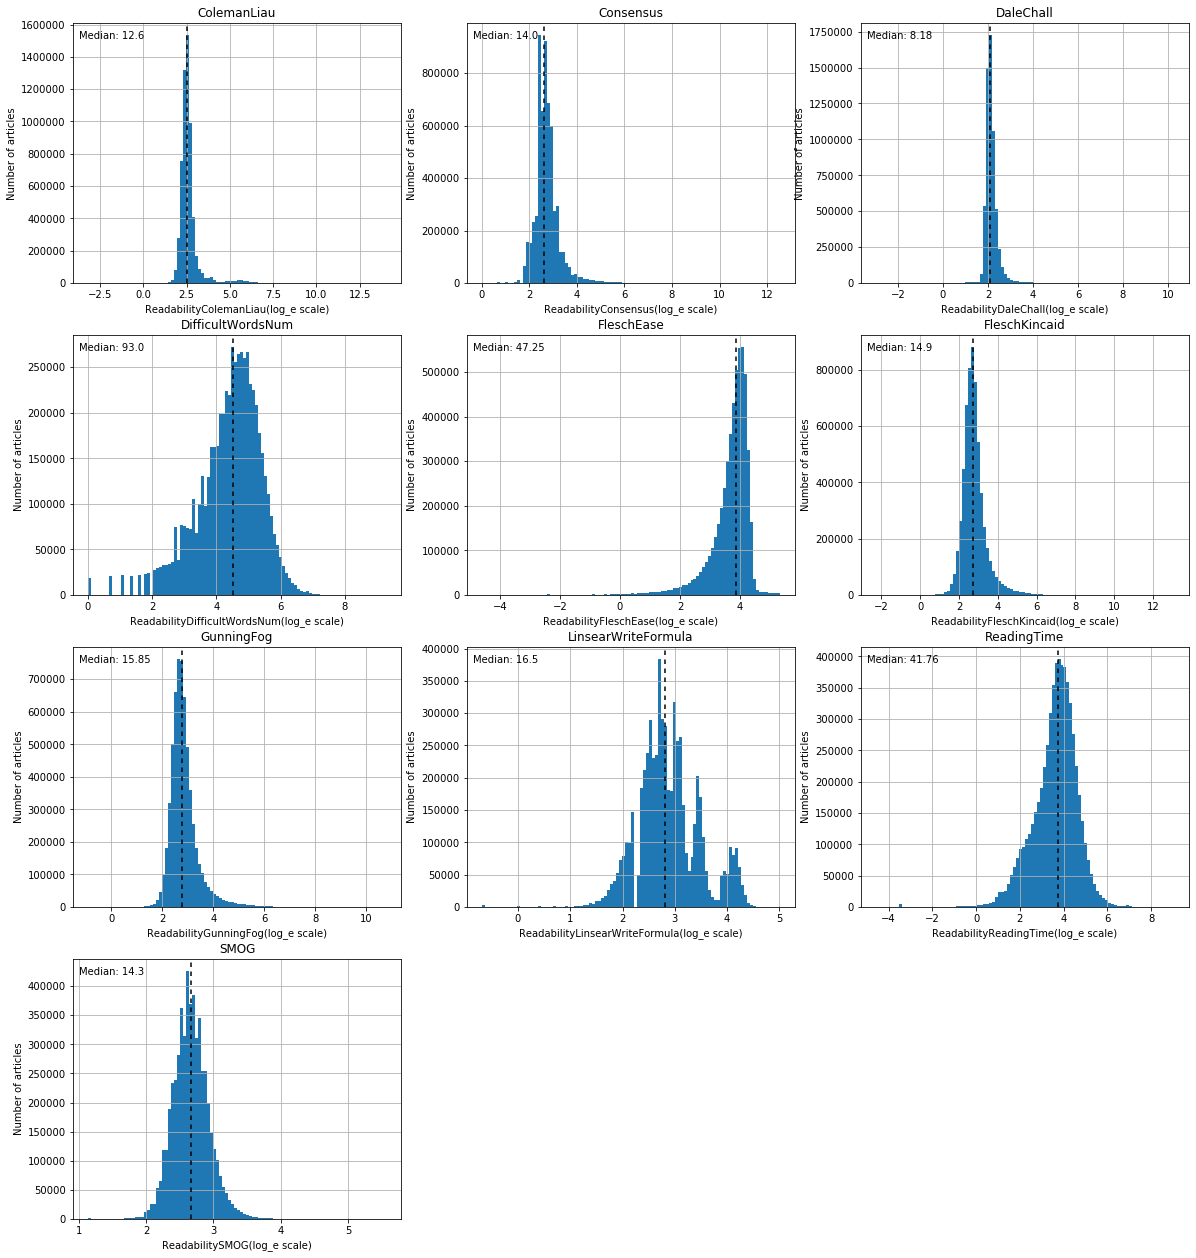

In [10]:
readabilityFeatures = ['ReadabilityARI', 'ReadabilityColemanLiau',
       'ReadabilityConsensus', 'ReadabilityDaleChall',
       'ReadabilityDifficultWordsNum', 'ReadabilityFleschEase',
       'ReadabilityFleschKincaid', 'ReadabilityGunningFog',
       'ReadabilityLinsearWriteFormula', 'ReadabilityReadingTime',
       'ReadabilitySMOG']

fig = plt.figure(figsize=(20,22));

for i in range(1, len(readabilityFeatures)):
    ax = fig.add_subplot(4,3,i);
    
    y = np.log(df[readabilityFeatures[i]]).replace(-np.inf, np.nan).dropna();
    print("Median of", readabilityFeatures[i], np.e**y.median());

    _ =ax = y.hist(bins=100);
    _ = ax.set_title(readabilityFeatures[i].replace("Readability", ""));
    _ = ax.set_xlabel( str(readabilityFeatures[i]+ "(log_e scale)"));
    _ = ax.set_ylabel("Number of articles");
    _ = ax.text(0.02, 0.95, s= str("Median: " + str(round(np.e**y.median(), 3))), ha='left', va='center', transform=ax.transAxes)
    _ = ax.axvline(y.median(), c="Black", dashes=[3, 3]);

# Resources Dimension

Aspects: images, links, code, highlight

## Images

Median number of images 5


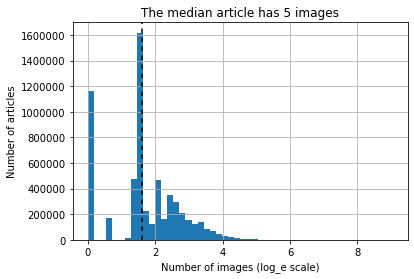

In [46]:
y = np.log1p(df.ImgNum);
print("Median number of images", round(np.e**y.median()));
ax = y.hist(bins=50);
ax.set_title("The median article has " + str(round(np.e**y.median())) + " images");
ax.set_xlabel("Number of images (log_e scale)");
ax.set_ylabel("Number of articles");
ax.axvline(y.median(), c="Black", dashes=[3, 3]);

## Links

Median number of links 3


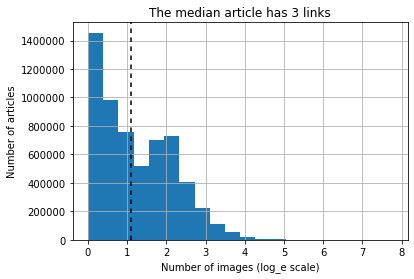

In [61]:
y = np.log1p(df.LinkNum);
print("Median number of links", round(np.e**y.median()));
ax = y.hist(bins=20);
ax.set_title("The median article has " + str(round(np.e**y.median())) + " links");
ax.set_xlabel("Number of images (log_e scale)");
ax.set_ylabel("Number of articles");
ax.axvline(y.median(), c="Black", dashes=[3, 3]);

## How many articles link to Stack Overflow?

### 0.5% (30.7k) of articles link to SO, and 4.2% (16.5k) of code-containing articles contain a link to Stack Overflow or Stack Exchange.

In [84]:
codeDF = df[(df['CodeBlockNum'] > 0) | (df['CodeInlineNum']>0)]
print("Percentage of all articles linking to Stack Overflow:", (df['LinkURLList'].str.contains("stackexchange").sum()+df['LinkURLList'].str.contains("stackoverflow").sum())/len(df)*100, (df['LinkURLList'].str.contains("stackexchange").sum()+df['LinkURLList'].str.contains("stackoverflow").sum()))

print("Percentage of all articles linking to Stack Overflow:", (codeDF['LinkURLList'].str.contains("stackexchange").sum()+codeDF['LinkURLList'].str.contains("stackoverflow").sum())/len(codeDF)*100, (codeDF['LinkURLList'].str.contains("stackexchange").sum()+codeDF['LinkURLList'].str.contains("stackoverflow").sum()))

Percentage of all articles linking to Stack Overflow: 0.5151010930892236 30765
Percentage of all articles linking to Stack Overflow: 4.255528153904218 16462


## Code

## Highlights

# Formatting Dimension

## Paragraphs

## Bold

## Italics

# Author Dimension

## How many articles has an author written?

## Relationship between author clap and article content

# Publication Dimension

## Which publications contain the lengthiest articles?

## Which publications contain the most code-heavy articles?

## Which publications contain complex articles?

# Tag Dimension

## Which tags contain the moost code-heavy articles?